# Análise da diferença de desempenho entre escolas públicas e privadas do estado de SP

Vamos verificar se a diferença entre as notas do ENEM 2019 para o estado de SP entre escolas públicas e privadas possuem diferença significativa após a observação da análise exploratória.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

import seaborn as sns
import matplotlib.pyplot as plt

## Buscando os dados

In [17]:
file_path = '/content/drive/MyDrive/Portfolio - Data Analysis | BI/ENEM SP 2019 Performance/enem_sp_2019_treated.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head(5)

,NU_INSCRICAO,MUNICIPIO_RESIDENCIA,UF_RESIDENCIA,IDADE,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,SITUACAO_CONCLUSAO_ENSINO,TP_ANO_CONCLUIU,TIPO_ESCOLA,TREINEIRO,CO_ESCOLA,MUNICIPIO_ESCOLA,UF_ESCOLA,TIPO_LOCALIZACAO_ESCOLA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TIPO_LINGUA,STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO,ACESSO_INTERNET,MEDIA_NOTAS,FAIXA_MEDIA_NOTAS
0,1,Santa Isabel,SP,22,M,Solteiro(a),Parda,Brasileiro(a),Concluiu Ensino Médio,4,Não Informado,Não,NaN,Não Informado,Não Informado,Não Informado,564.6,585.8,592.9,600.2,Inglês,Sem problemas,160.0,200.0,180.0,200.0,200.0,940.0,Possui,656.70,601-700
1,4,São Bernardo do Campo,SP,19,M,Solteiro(a),Parda,Brasileiro(a),Cursando último ano do Ensino Médio,0,Pública,Não,35904958.0,São Bernardo do Campo,SP,Urbana,402.2,424.8,509.6,393.2,Espanhol,Sem problemas,80.0,160.0,120.0,100.0,100.0,560.0,Possui,457.96,401-500
2,6,Embu-Guaçu,SP,17,F,Solteiro(a),Parda,Brasileiro(a),Cursando último ano do Ensino Médio,0,Pública,Não,NaN,Não Informado,Não Informado,Não Informado,399.6,426.8,487.2,419.2,Inglês,Sem problemas,120.0,120.0,120.0,120.0,80.0,560.0,Possui,458.56,401-500
3,9,Guarulhos,SP,23,F,Solteiro(a),Branca,Brasileiro(a),Concluiu Ensino Médio,5,Não Informado,Não,NaN,Não Informado,Não Informado,Não Informado,625.7,646.5,629.3,796.1,Inglês,Sem problemas,160.0,200.0,180.0,180.0,160.0,880.0,Possui,715.52,701-800
4,11,São José do Rio Preto,SP,18,F,Solteiro(a),Branca,Brasileiro(a),Cursando último ano do Ensino Médio,0,Pública,Não,35028927.0,São José do Rio Preto,SP,Urbana,449.5,533.3,555.9,612.8,Espanhol,Sem problemas,120.0,160.0,120.0,80.0,100.0,580.0,Não possui,546.30,501-600


## Organizando os dados

In [6]:
# conjunto para escolas públicas
escolas_pub = df[df['TIPO_ESCOLA']=='Pública'][['NU_INSCRICAO', 'TIPO_ESCOLA', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO', 'MEDIA_NOTAS']]
escolas_pub

,NU_INSCRICAO,TIPO_ESCOLA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,MEDIA_NOTAS
1,4,Pública,402.2,424.8,509.6,393.2,560.0,457.96
2,6,Pública,399.6,426.8,487.2,419.2,560.0,458.56
4,11,Pública,449.5,533.3,555.9,612.8,580.0,546.30
11,28,Pública,499.1,540.3,549.2,535.1,680.0,560.74
12,31,Pública,387.9,52.5,475.3,423.8,520.0,371.90
...,...,...,...,...,...,...,...,...
580642,813764,Pública,535.6,43.6,566.9,534.7,660.0,468.16
580645,813768,Pública,367.4,455.9,499.7,43.2,560.0,385.24
580646,813769,Pública,398.6,468.3,483.9,487.3,380.0,443.62
580647,813770,Pública,402.8,561.8,53.5,401.1,740.0,431.84


In [7]:
# conjunto para escolas privada
escolas_priv = df[df['TIPO_ESCOLA']=='Privada'][['NU_INSCRICAO', 'TIPO_ESCOLA', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO', 'MEDIA_NOTAS']]
escolas_priv

,NU_INSCRICAO,TIPO_ESCOLA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO,MEDIA_NOTAS
68,124,Privada,616.7,663.2,643.7,718.4,840.0,696.40
174,299,Privada,563.7,551.3,582.3,624.4,720.0,608.34
235,385,Privada,417.1,358.7,423.1,479.6,340.0,403.70
259,413,Privada,562.5,605.5,56.2,653.9,660.0,507.62
268,425,Privada,579.7,664.7,612.3,489.8,640.0,597.30
...,...,...,...,...,...,...,...,...
580451,813486,Privada,60.8,587.9,575.9,699.3,880.0,560.78
580521,813585,Privada,582.1,60.7,613.8,716.2,700.0,534.56
580558,813634,Privada,571.9,561.2,55.0,466.7,620.0,454.96
580559,813636,Privada,51.1,596.6,573.5,65.8,580.0,373.40


## Analisando normalidade

### Escolas públicas

<Axes: xlabel='MEDIA_NOTAS', ylabel='Probability'>

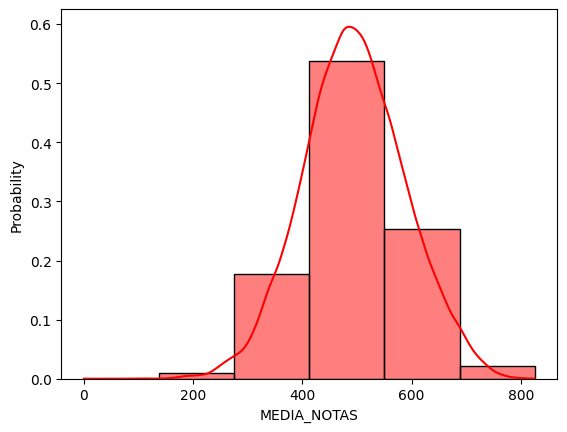

In [8]:
sns.histplot(escolas_pub, x='MEDIA_NOTAS', bins = 6, color='red', kde=True, stat='probability')

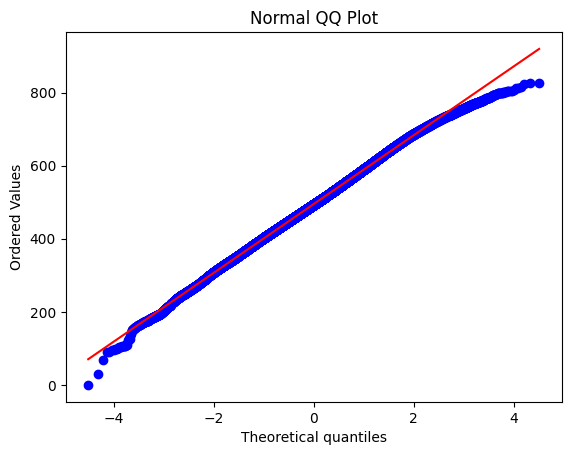

In [9]:
stats.probplot(escolas_pub['MEDIA_NOTAS'], dist='norm', plot=plt)
plt.title('Normal QQ Plot')
plt.show()

In [10]:
# Teste Lilliefors (N > 5000) (Kolmogorov-Smirnov)
stat, p = statsmodels.stats.diagnostic.lilliefors(escolas_pub.MEDIA_NOTAS, dist='norm')

print(f"Estatística de teste: {stat}, p-valor: {p}")

alfa = 0.05
if p > alfa:
  print("Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0)")
else:
  print("Os dados não seguem uma distribuição normal (rejeitamos H0)")

Estatística de teste: 0.0074923431999428525, p-valor: 0.0009999999999998899
Os dados não seguem uma distribuição normal (rejeitamos H0)


### Escolas privadas

<Axes: xlabel='MEDIA_NOTAS', ylabel='Probability'>

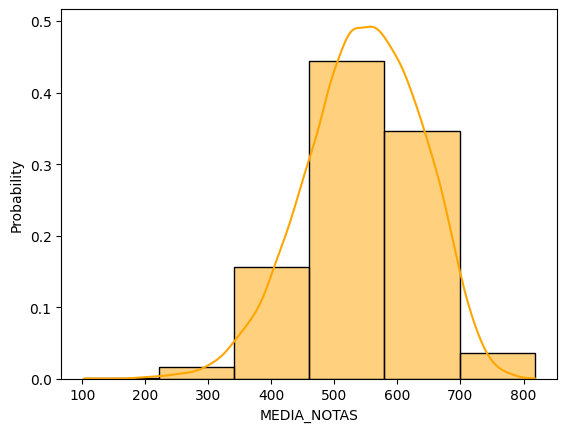

In [11]:
sns.histplot(escolas_priv, x='MEDIA_NOTAS', bins=6, color='orange', kde=True, stat='probability')

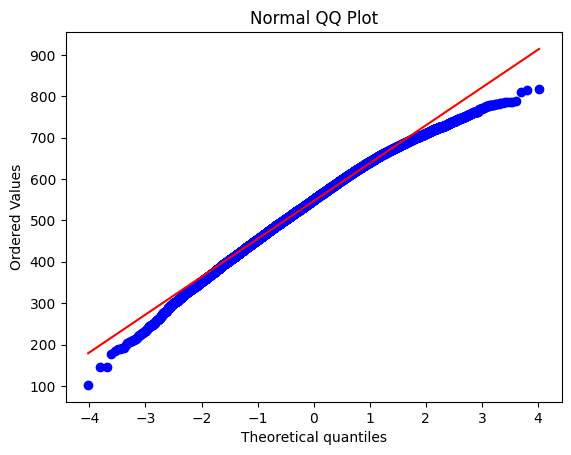

In [12]:
stats.probplot(escolas_priv['MEDIA_NOTAS'], dist='norm', plot=plt)
plt.title('Normal QQ Plot')
plt.show()

In [13]:
# Teste Lilliefors (N > 5000) (Kolmogorov-Smirnov)
stat, p = statsmodels.stats.diagnostic.lilliefors(escolas_priv.MEDIA_NOTAS, dist='norm')

print(f"Estatística de teste: {stat}, p-valor: {p}")

alfa = 0.05
if p > alfa:
  print("Os dados parecem seguir uma distribuição normal (não podemos rejeitar H0)")
else:
  print("Os dados não seguem uma distribuição normal (rejeitamos H0)")

Estatística de teste: 0.02082931654950848, p-valor: 0.0009999999999998899
Os dados não seguem uma distribuição normal (rejeitamos H0)


## Teste Mann Whitney


Como estamos comparando dois grupos de amostras independentes onde os dados são não paramétricos, optamos por utilizar o teste de Mann Whitney.

* Ho = Não há diferença entre as medianas das notas de escolas públicas e privdas: p > 0.05
* Ha = Há diferença entre as medianas das notas entre escolas públicas e privadas: p <= 0.05

In [14]:
stat, p = stats.mannwhitneyu(escolas_pub.MEDIA_NOTAS, escolas_priv.MEDIA_NOTAS)

print(f"Estatística de teste: {stat.round(4)}, P-valor: {p.round(4)}")

alfa = 0.05
if p > alfa:
  print("Não há diferença entre as medianas das notas de escolas públicas e privdas")
else:
  print("Há diferença entre as medianas das notas entre escolas públicas e privadas")

Estatística de teste: 1730955516.0, P-valor: 0.0
Há diferença entre as medianas das notas entre escolas públicas e privadas


## Conclusão

In [15]:
escolas_pub.MEDIA_NOTAS.median()

493.4

In [16]:
escolas_priv.MEDIA_NOTAS.median()

550.3799999999999

Neste teste obtivemos um p = 0.0 o que indica um valor p muito baixo, evidenciando que existe uma diferença significativa entre a mediana de escolas públicas e privadas.

* MEDIANA ESCOLAS PÚBLICAS EM SP: 482.12
* MEDIANA ESCOLAS PRIVADAS EM SP: 565.88